<a href="https://colab.research.google.com/github/theparthdhumal/Minor-Projects/blob/main/Minor_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Used Car Price Dataset**

We will now, explore the Data Set of Extensive Used Car Price for Predictive Modeling to perform Exploratory Data Analysis(EDA) on this Data set. The major things we will be doing to perform EDA are:


1.   **Removing** **Duplicates**
2.   **Missing** **value** **treatment**
3.   **Outlier** **Treatment**
4.   **Normalization** **and** **Scaling**(**Numerical** **Variables**)
5.   **Encoding** **Categorial** **variables**(**Dummy** **variables**)
6.   **Univerate** **Analysis**
7.   **Bivariate** **Analysis**



**Firstly, we will import all the necessary libraries that are required to perform the EDA.**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Data set**

Now, we wil be loading the Data set Excel file using the Pandas, by the following process:

In [ ]:
df = pd.read_csv('car_dataset.csv')

# **Basic Data Exploration**

In this, we are going to perform the below operations to check what the data set comprises of. We are going to check the below things:


1.   **Head** **of** **the** **dataset**
2.   **Shape** **of** **the** **dataset**
3.   **Info** **of** **the** **dataset**
4.   **Summary** **of** **the** **dataset**






In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**There is a note here that the head function takes the top records of the data set. Also, by default we know that python only displays top 5 records.**

In [ ]:
df.shape

(301, 9)

**Shape attribute tells us the number of obeservations and variables. It is used to check the dimension of data. This data set has 301 observations and 9 variables in the data set.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Info is used to check the information about the data and the datatypes of each respective attributes.**

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The describe method will be used to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# **Check for duplicate records**

In [ ]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 2


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


**Since, we have 2 duplicate records in the data set, we will remove this from the data set so that we will only have distinct records.**

In [ ]:
df.drop_duplicates(inplace=True)

**Now, As we have executed the removal of duplicate records, we will now cross check whether it has gone or not.**

In [ ]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


**Now, after this we will check the how many observations and variables are there in the final removed used car prices data set after removal of the duplicate records. We will do this by using the shape attribute again.**

In [ ]:
df.shape

(299, 9)

# **Outlier** **Treatment**



To check for outliners, we will be plotting the box plots

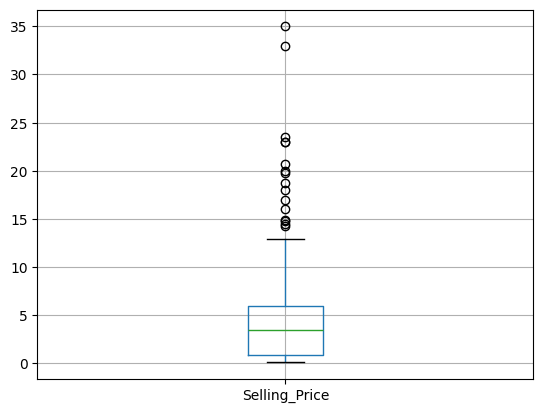

In [ ]:
df.boxplot(column=['Selling_Price'])
plt.show()

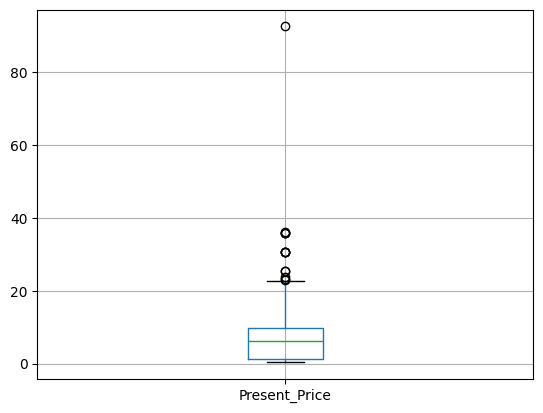

In [ ]:
df.boxplot(column=['Present_Price'])
plt.show()

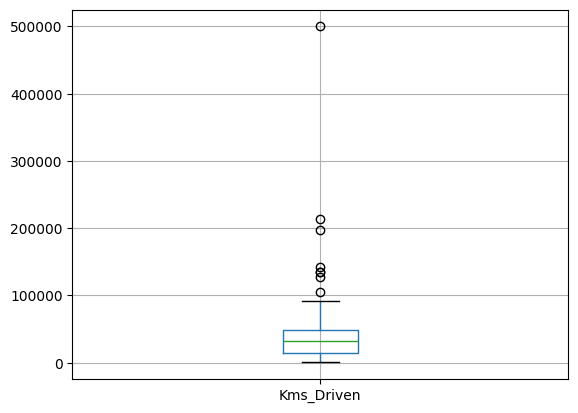

In [ ]:
df.boxplot(column=['Kms_Driven'])
plt.show()

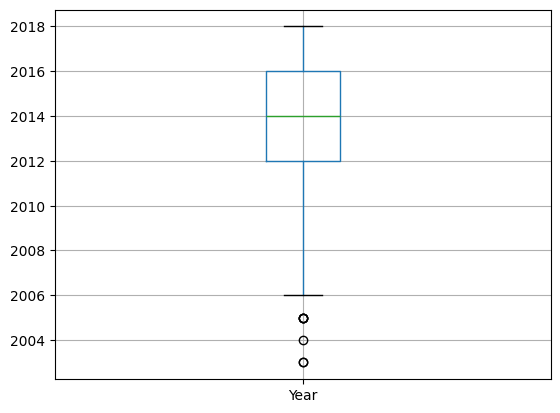

In [ ]:
df.boxplot(column=['Year'])
plt.show()

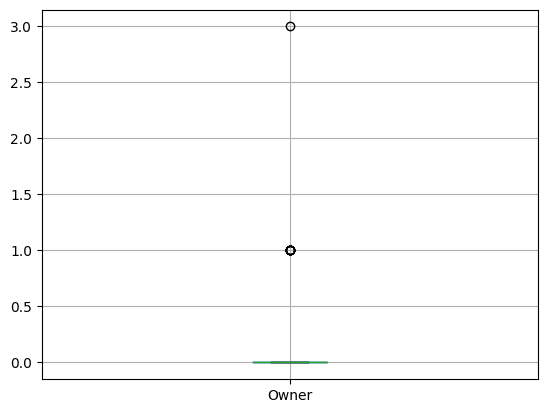

In [ ]:
df.boxplot(column=['Owner'])
plt.show()

By observing the box plots, it seems that Selling_Price, Present_Price, Years, Owner, Kms_Driven have outliers present in the variables.

These outliers value needs to be treated and there are several ways of treating them:


*   Drop the outlier value
*   Replace the outlier value using the IQR

Created a user defineded function for finding the lower and upper range for a variable so that the outlier can be treated.


In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lrincome, urincome = remove_outlier(df['Selling_Price'])
df['Selling_Price'] = np.where(df['Selling_Price'] > urincome, urincome, df['Selling_Price'])
df['Selling_Price'] = np.where(df['Selling_Price'] < lrincome, lrincome, df['Selling_Price'])

lrtravel, urtravel = remove_outlier(df['Present_Price'])
df['Present_Price'] = np.where(df['Present_Price'] > urtravel, urtravel, df['Present_Price'])
df['Present_Price'] = np.where(df['Present_Price'] < lrtravel, lrtravel, df['Present_Price'])

lrmiles, urmiles = remove_outlier(df['Kms_Driven'])
df['Kms_Driven'] = np.where(df['Kms_Driven'] > urmiles, urmiles, df['Kms_Driven'])
df['Kms_Driven'] = np.where(df['Kms_Driven'] < lrmiles, lrmiles, df['Kms_Driven'])

lrmiles, urmiles = remove_outlier(df['Year'])
df['Year'] = np.where(df['Year'] > urmiles, urmiles, df['Year'])
df['Year'] = np.where(df['Year'] < lrmiles, lrmiles, df['Year'])

irtravel, urtravel = remove_outlier(df['Owner'])
df['Owner'] = np.where(df['Owner'] > urtravel, urtravel, df['Owner'])
df['Owner'] = np.where(df['Owner'] < irtravel, irtravel, df['Owner'])

df.shape

(299, 9)

# **Make boxplots to check the outliers after treatment**

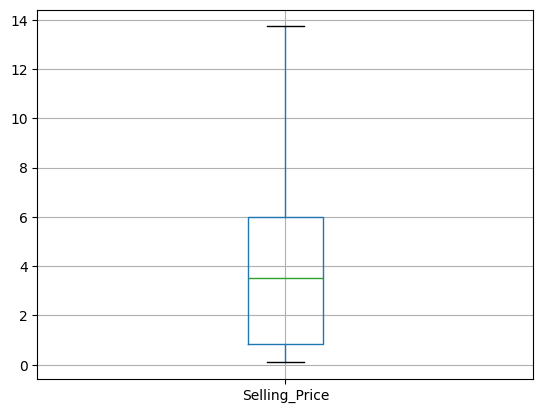

In [ ]:
df.boxplot(column=['Selling_Price'])
plt.show()

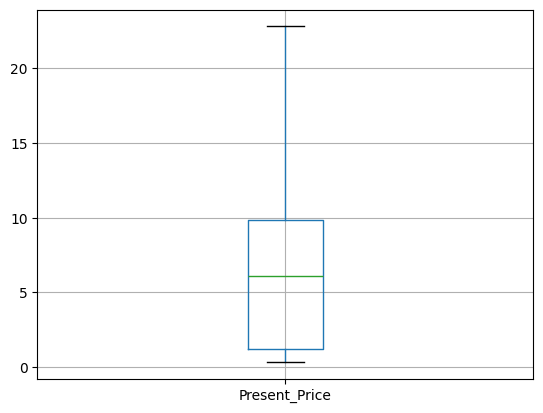

In [ ]:
df.boxplot(column=['Present_Price'])
plt.show()

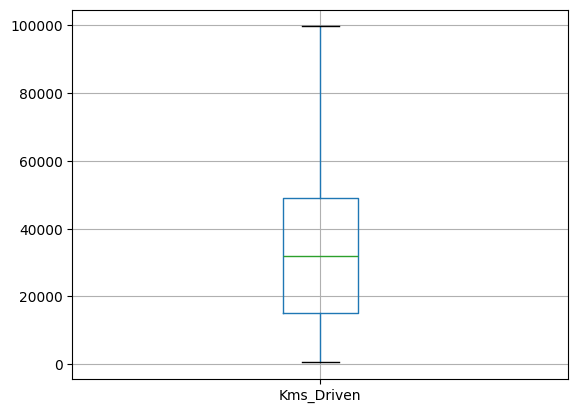

In [ ]:
df.boxplot(column=['Kms_Driven'])
plt.show()

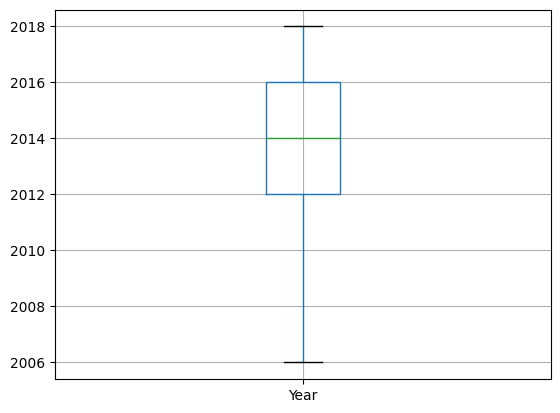

In [ ]:
df.boxplot(column=['Year'])
plt.show()

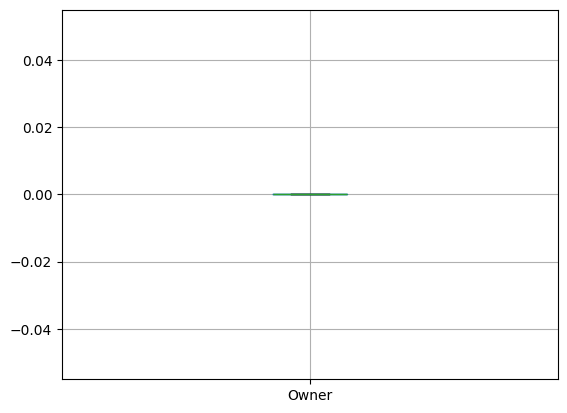

In [ ]:
df.boxplot(column=['Owner'])
plt.show()

**As, we can observe there are no outliers left after their respective treatment**

# **Check for the missing values**

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Here we can see, that fortunately it does not have any missing values but for us to know how we should treat the missing values if there are any we can follow the following process:


1. Drop the missing values: In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.

2. Impute with mean value: For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values.i.e. outliers.

3. Impute with median value: For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.

4. Impute with mode value: For categorical column, you can replace the missing values with mode values i.e the frequent ones

5. we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.




In [ ]:
#df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

In [ ]:
#Replacing Null values in numerical columns using median
"""
median1 = df["Selling_Price"].median()
median2 = df["Present_Price"].median()
median3 = df["Kms_Driven"].median()
median4 = df["Year"].median()
median5 = df["Owner"].median()

df["Selling_Price"].replace(np.nan, median1, inplace=True)
df["Present_Price"].replace(np.nan, median2, inplace=True)
df["Kms_Driven"].replace(np.nan, median3, inplace=True)
df["Year"].replace(np.nan, median4, inplace=True)
df["Owner"].replace(np.nan, median5, inplace=True)
"""

In [ ]:
#Replacing Null values in categorial columns using mode
"""
mode1 = df["Fuel_Type"].mode()[0]
mode2 = df["Seller_Type"].mode()[0]
mode3 = df["Transmission"].mode()[0]
mode4 = df["Car_Name"].mode()[0]

df["Fuel_Type"]=df.replace(np.nan, mode1, inplace=True)
df["Seller_Type"]=df.replace(np.nan, mode2, inplace=True)
df["Transmission"]=df.replace(np.nan, mode3, inplace=True)
df["Car_Name"]=df.replace(np.nan, mode4, inplace=True)
"""


# **Normalization and Scaling(Numerical Variables)**

**Following is the process for Normalization and scaling**

### **Identifying Numerical Variables**

In [ ]:
# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


### **Standardization (StandardScaler)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_scaled_standard = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_standard[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

print("DataFrame after Standardization:")
display(df_scaled_standard.head())

DataFrame after Standardization:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,0.124434,-0.237412,-0.232533,-0.310643,Petrol,Dealer,Manual,0.0
1,sx4,-0.236788,0.138845,0.416841,0.362190,Diesel,Dealer,Manual,0.0
2,ciaz,1.208100,0.810731,0.467805,-1.155889,Petrol,Dealer,Manual,0.0
3,wagon r,-0.959231,-0.371789,-0.469267,-1.227378,Petrol,Dealer,Manual,0.0
4,swift,0.124434,0.098531,-0.022103,0.339062,Diesel,Dealer,Manual,0.0


### **Normalization (MinMaxScaler)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_minmax[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

print("DataFrame after Normalization:")
display(df_scaled_minmax.head())

DataFrame after Normalization:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,0.666667,0.238532,0.234431,0.267114,Petrol,Dealer,Manual,0.0
1,sx4,0.583333,0.341284,0.410142,0.428390,Diesel,Dealer,Manual,0.0
2,ciaz,0.916667,0.524771,0.423932,0.064510,Petrol,Dealer,Manual,0.0
3,wagon r,0.416667,0.201835,0.170374,0.047375,Petrol,Dealer,Manual,0.0
4,swift,0.666667,0.330275,0.291370,0.422846,Diesel,Dealer,Manual,0.0


Now you have two new DataFrames, `df_scaled_standard` and `df_scaled_minmax`, with the numerical columns scaled using Standardization and Normalization respectively.

# **Univerate Analysis**

**Following are the Univerate Analysis for the columns used same as the treatment for outliers:**

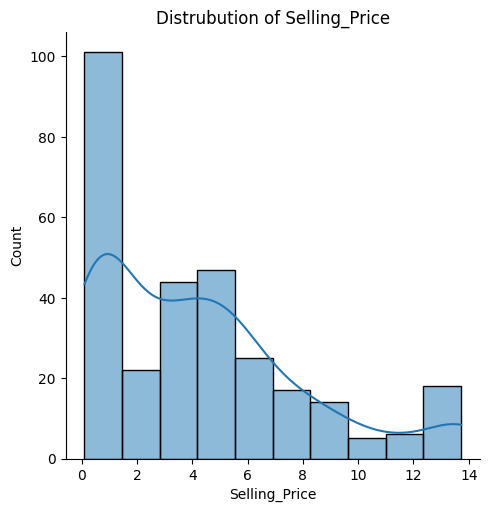

In [ ]:
# Visualize distribution of Selling_Price
sns.displot(df['Selling_Price'], kde = True)
plt.title('Distrubution of Selling_Price')
plt.show()

**For above figure, we can say that the Selling_Price parameter is right Skewed.**

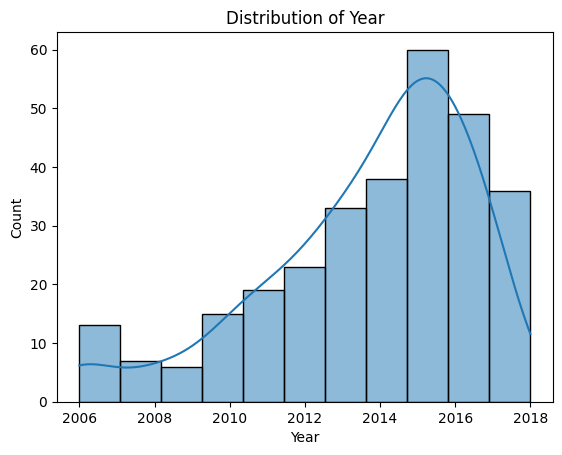

In [ ]:
# Visualize distribution of Year
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Year')
plt.show()

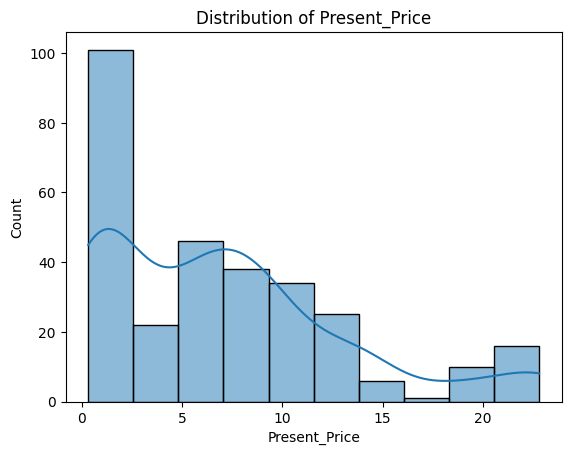

In [ ]:
# Visualize distribution of Present_Price
sns.histplot(df['Present_Price'], kde=True)
plt.title('Distribution of Present_Price')
plt.show()

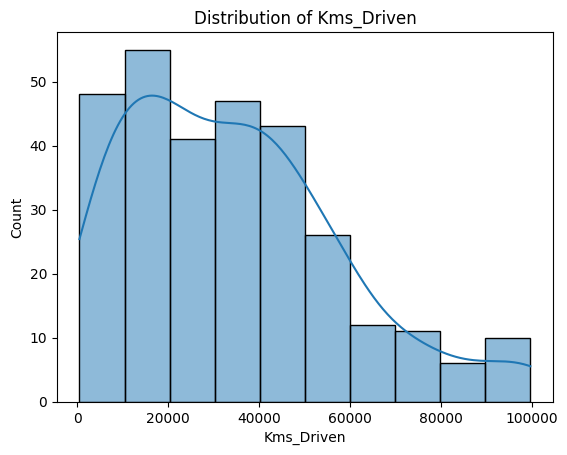

In [ ]:
# Visualize distribution of Kms_Driven
sns.histplot(df['Kms_Driven'], kde=True)
plt.title('Distribution of Kms_Driven')
plt.show()

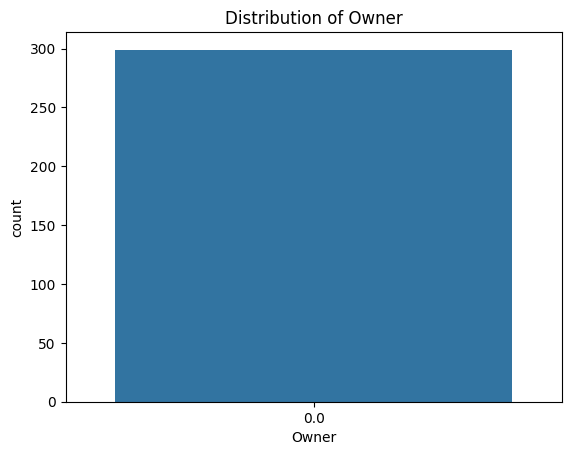

In [ ]:
# Visualize distribution of Owner
sns.countplot(x='Owner', data=df)
plt.title('Distribution of Owner')
plt.show()

**Thats all for the Univerate Analysis**

# **Bivariate Analysis**

**Following is the Bivariate Analysis for the Extensive Used Car Price for Predictive Modeling Dataset**

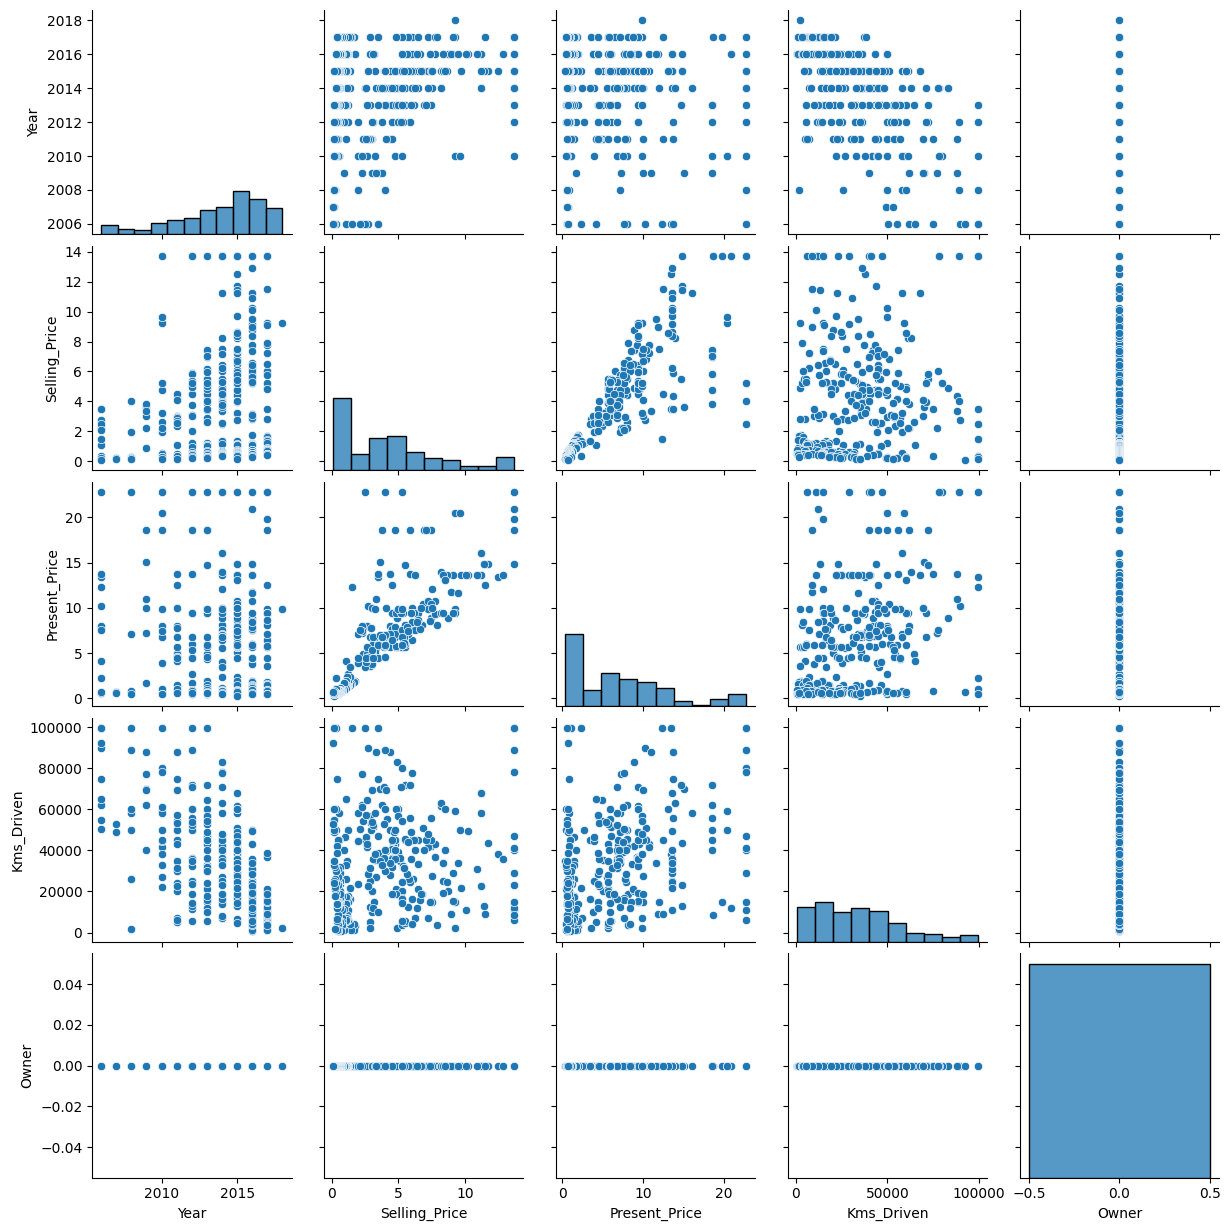

In [ ]:
sns.pairplot(df)
plt.show()

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

In [ ]:
df.corr()

ValueError: could not convert string to float: 'ritz'

# **Encoding Categorical Variables (One-Hot Encoding)**

In [ ]:
# Select categorical columns to encode (excluding Car_Name for now)
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after One-Hot Encoding:")
display(df_encoded.head())

DataFrame after One-Hot Encoding:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014.0,3.35,5.59,27000.0,0.0,False,True,False,True
1,sx4,2013.0,4.75,9.54,43000.0,0.0,True,False,False,True
2,ciaz,2017.0,7.25,9.85,6900.0,0.0,False,True,False,True
3,wagon r,2011.0,2.85,4.15,5200.0,0.0,False,True,False,True
4,swift,2014.0,4.60,6.87,42450.0,0.0,True,False,False,True


We used `pd.get_dummies()` to perform the one-hot encoding. The `drop_first=True` argument is used to drop the first category in each original column to avoid multicollinearity.

Now that the categorical variables are encoded into numerical format, you can calculate the correlation matrix for the `df_encoded` DataFrame.

Let's calculate and visualize the correlation matrix for the encoded DataFrame.

Correlation Matrix:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.281223,-0.039317,-0.641909,NaN,0.054934,-0.050281,-0.036581,0.002028
Selling_Price,0.281223,1.000000,0.868861,0.126259,NaN,0.554039,-0.541914,-0.673980,-0.288933
Present_Price,-0.039317,0.868861,1.000000,0.388529,NaN,0.475670,-0.468009,-0.664198,-0.356227
Kms_Driven,-0.641909,0.126259,0.388529,1.000000,NaN,0.287033,-0.289259,-0.268473,-0.093170
Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type_Diesel,0.054934,0.554039,0.475670,0.287033,NaN,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.050281,-0.541914,-0.468009,-0.289259,NaN,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.036581,-0.673980,-0.664198,-0.268473,NaN,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,0.002028,-0.288933,-0.356227,-0.093170,NaN,-0.086264,0.078700,0.058669,1.000000


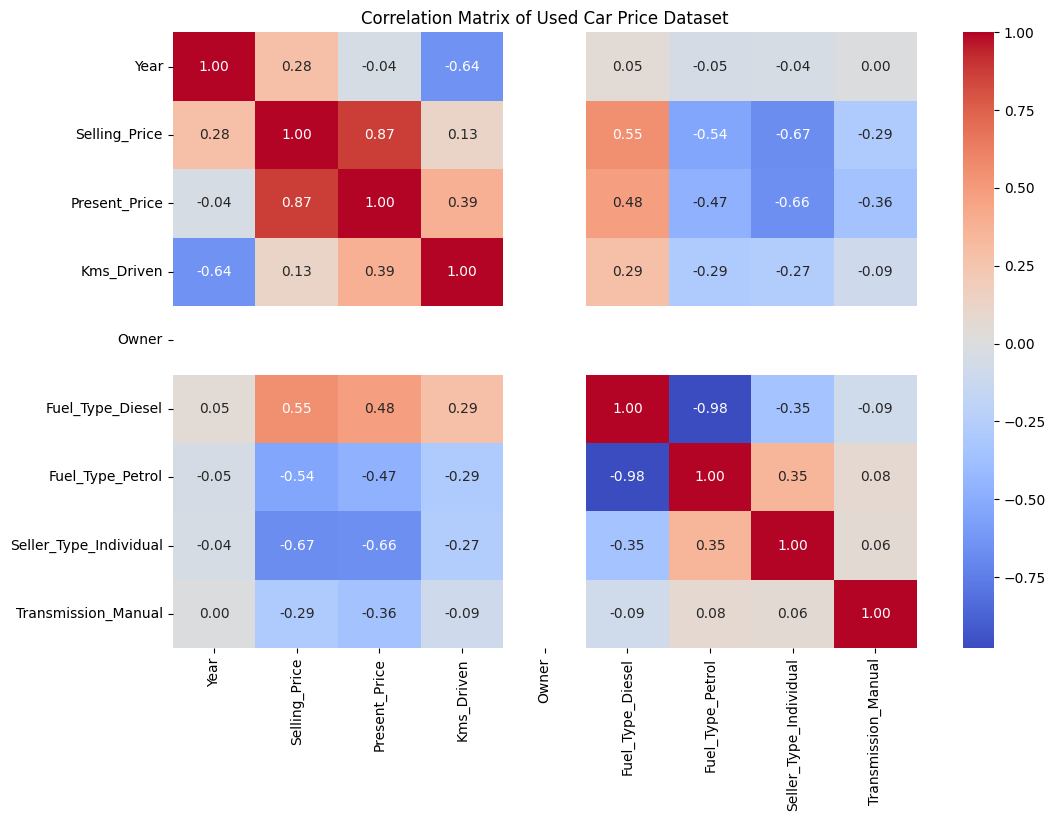

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.drop('Car_Name', axis=1).corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Used Car Price Dataset')
plt.show()